# Bike Share Analysis (2021 Data)

*Author: Aiden Fontes*  
*Date: 18 July 2025* 

**Project:** Divvy Bike Share Data Analysis  
**Goal:** Understand how annual members and casual riders use Divvy bikes differently to provide insights that can increase memberships.  
**Framework:** Google Data Analytics 6-step process (Ask → Prepare → Process → Analyze → Share → Act)  

---
## 1. Ask — Define the Business Task

- **Business Task:**  
    How do annual members and casual riders use Divvy bikes differently?  

- **Goal:**  
    Provide insights to help convert more casual riders into annual members.  

- **Stakeholders:**  
    - Divvy Bike Share marketing team  
    - Divvy operations team (bike allocation & maintenance)  

- **Success Criteria:**  
    - Clear, actionable insights for targeted marketing strategies and operational improvements.  

---
## 2. Prepare — Import & Understand the Data

In [16]:
import pandas as pd

df1 = pd.read_csv(r"/Users/katherinefontes/Desktop/Bike data 2021/202101-divvy-tripdata.csv")
df2 = pd.read_csv(r"/Users/katherinefontes/Desktop/Bike data 2021/202102-divvy-tripdata.csv")
df3 = pd.read_csv(r"/Users/katherinefontes/Desktop/Bike data 2021/202103-divvy-tripdata.csv")
df4 = pd.read_csv(r"/Users/katherinefontes/Desktop/Bike data 2021/202104-divvy-tripdata.csv")
df5 = pd.read_csv(r"/Users/katherinefontes/Desktop/Bike data 2021/202105-divvy-tripdata.csv")
df6 = pd.read_csv(r"/Users/katherinefontes/Desktop/Bike data 2021/202106-divvy-tripdata.csv")
df7 = pd.read_csv(r"/Users/katherinefontes/Desktop/Bike data 2021/202107-divvy-tripdata.csv")
df8 = pd.read_csv(r"/Users/katherinefontes/Desktop/Bike data 2021/202108-divvy-tripdata.csv")
df9 = pd.read_csv(r"/Users/katherinefontes/Desktop/Bike data 2021/202109-divvy-tripdata.csv")
df10 = pd.read_csv(r"/Users/katherinefontes/Desktop/Bike data 2021/202110-divvy-tripdata.csv")
df11 = pd.read_csv(r"/Users/katherinefontes/Desktop/Bike data 2021/202111-divvy-tripdata.csv")
df12 = pd.read_csv(r"/Users/katherinefontes/Desktop/Bike data 2021/202112-divvy-tripdata.csv")

# combine into single dataframe
df_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12] # combine into list
df = pd.concat(df_list, ignore_index=True) # combine list into single dataframe
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 554.9+ MB


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


**Notes:**
- Data covers Jan–Dec 2021.
- Key columns:
    - `ride_id`, `rideable_type`, `started_at`, `ended_at`, `start_station_name`, `end_station_name`, `member_casual`.

---
## 3. Process — Clean & Transform the Data

In [17]:
# convert to date time

df["started_at"] = pd.to_datetime(df["started_at"], errors='coerce')
df["ended_at"] = pd.to_datetime(df["ended_at"], errors='coerce')

# drop entire rows that have na in started_at, ended_at, start_station_name, end_station_name

#df["started_at"].isnull().sum()
df = df.dropna(subset=['started_at', 'ended_at', 'start_station_name', 'end_station_name'])

# create a column for the ride duration in minutes

df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds()/60
#df["ride_duration"].head(15)

# only keep durations that are greater then 0

df = df[df['ride_duration']>0]

# standardise relevant columns

df["rideable_type"] = df["rideable_type"].str.strip().str.lower()
df["member_casual"] = df["member_casual"].str.strip().str.lower()

# split up datetime columns into three distinct columns (month, day of the week, time)

df["started_at_month"] = df["started_at"].dt.month_name() # month
df["started_at_day"] = df["started_at"].dt.day_name() # day of the week
df["started_at_hour"] = df["started_at"].dt.hour # hour

# drop unwanted columns

df = df.drop(columns=["start_lat", "start_lng", "end_lat", "end_lng"])

# reset index

df.reset_index(drop=True, inplace=True)

**Processing steps completed:**
- Converted dates to datetime.
- Removed invalid rows (nulls & zero/negative durations).
- Created new features: ride duration, month, day of week, hour.
- Standardized categorical fields.
- Dropped unnecessary columns.

---
## 4. Analyze — Explore the Data

In [20]:
# number of rides by user type
df["member_casual"].value_counts()

# average ride duration by user type
df.groupby("member_casual")["ride_duration"].mean()

# grouped aggregations (day of the week, hour of day and and rideable type)
# df.groupby(["member_casual", "started_at_day"], observed=True).size().unstack().T
rides_by_day = df.groupby(["member_casual", "started_at_day"], observed=True)["ride_duration"].mean().unstack().T
rides_by_hour = df.groupby(["member_casual", "started_at_hour"]).size().unstack()
rides_by_type = df.groupby(["member_casual", "rideable_type"]).size().unstack().T

---
## 5. Share — Visualise & Communicate

### 5.1 Import seaborn and matplotlib libraries for plotting and visualisation

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

### 5.2 Creating a barplot showing number of rides for each day of the week by user type

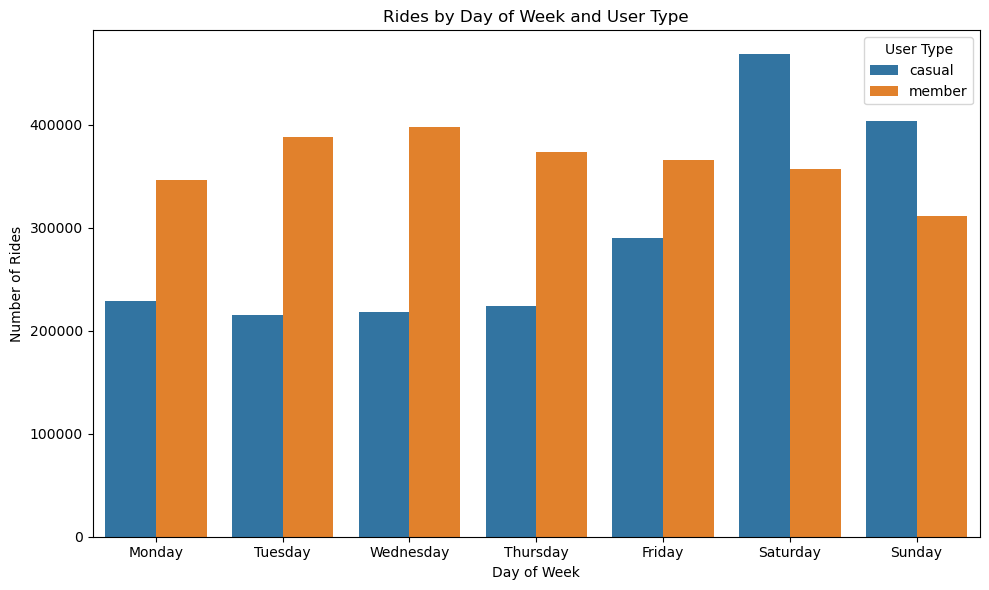

In [22]:
# order for days
rides_by_day = df.groupby(["member_casual", "started_at_day"], observed=True).size().reset_index(name='ride_count')
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# barplot: rides by day
plt.figure(figsize=(10,6))
sns.barplot(data=rides_by_day, x='started_at_day', y='ride_count', hue='member_casual', order=day_order)
plt.title('Rides by Day of Week and User Type')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.legend(title='User Type')
plt.tight_layout()
plt.show()


**Key insight:** 
- It appears that more members use bikes on the week days whereas there is a spike in bike use for casual riders on the
weekend. This suggests that members use the bike for work commutes and casual riders use the bikes for recreational use.

- Weekday uses can be targeted with loyalty programs and weekend users can be targerted with weekend promotions

### 5.3 Creating a barplot showing average ride duration for each day of the week by user type

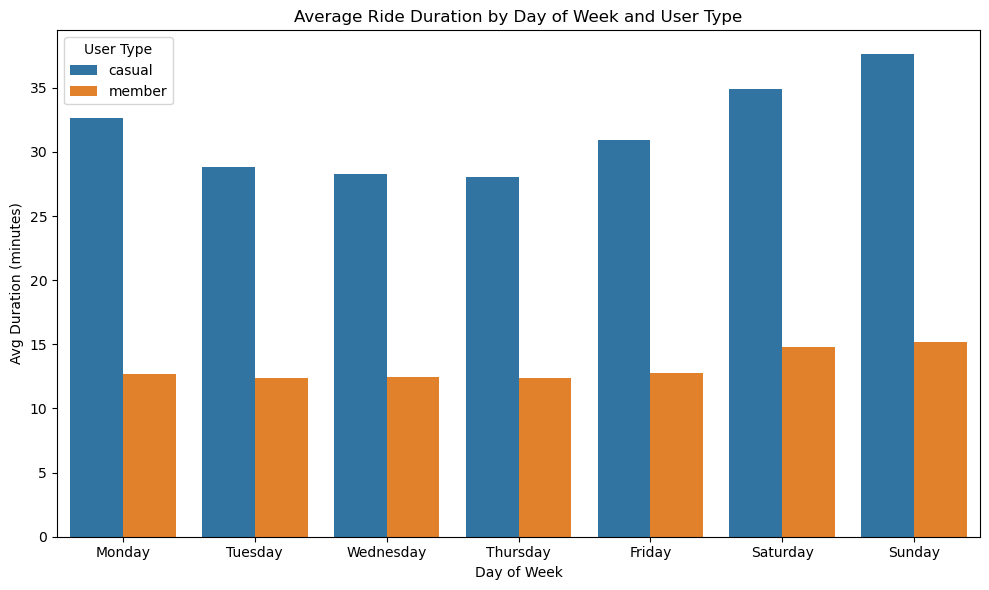

In [34]:
# plotting average ride duration against each day of the week for both members and casual riders
avg_duration_by_day = df.groupby(["member_casual", "started_at_day"], observed=True)["ride_duration"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_duration_by_day, x='started_at_day', y='ride_duration', hue='member_casual', order=day_order
)
plt.title('Average Ride Duration by Day of Week and User Type')
plt.xlabel('Day of Week')
plt.ylabel('Avg Duration (minutes)')
plt.legend(title='User Type')
plt.tight_layout()
plt.show()

**Key insight:** 
- Casual riders take longer trips suggesting recreational/leisurley riding whereas members take short trips strenghening the 
hypothsis of riding for commuting purposes.

- Shorter duration riders should be targeted with hourly ride packages and longer duration riders should be targeted with tourist-friendly plans (i.e. discount for rides over one hour)

### 5.4 Creating a barplot showing number of rides for each month by user type

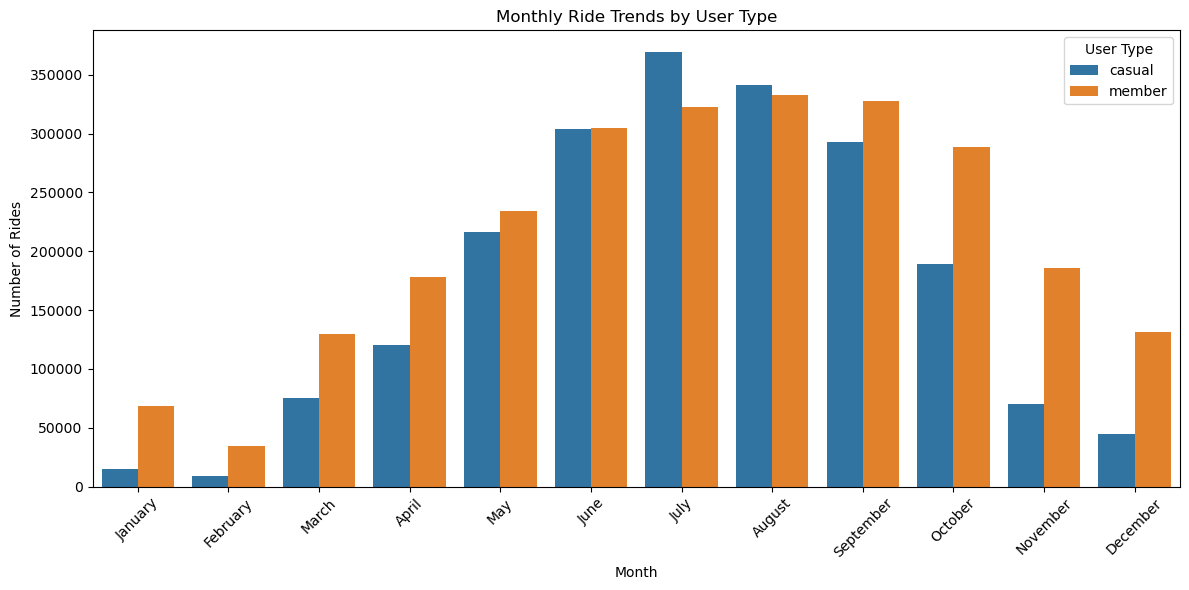

In [32]:
# Group by month (keep month order)
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
rides_by_month = df.groupby(["member_casual", "started_at_month"], observed=True).size().reset_index(name='ride_count')

# Ensure correct month order
rides_by_month['started_at_month'] = pd.Categorical(rides_by_month['started_at_month'], categories=month_order, ordered=True)
rides_by_month = rides_by_month.sort_values(['member_casual','started_at_month'])

# Plot monthly ride trends
plt.figure(figsize=(12,6))
sns.barplot(data=rides_by_month, x='started_at_month', y='ride_count', hue='member_casual')
plt.title('Monthly Ride Trends by User Type')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.legend(title='User Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Key insight:**

- There is a strong seasonal spike suggesting both members and casuals ride mostly in the warmer months (June–September) 

- Casual ridership drops off more sharply in colder months compared to members (who maintain a steadier baseline).

### 5.5 Creating a linegraph showing number of rides for each hour of the day by user type

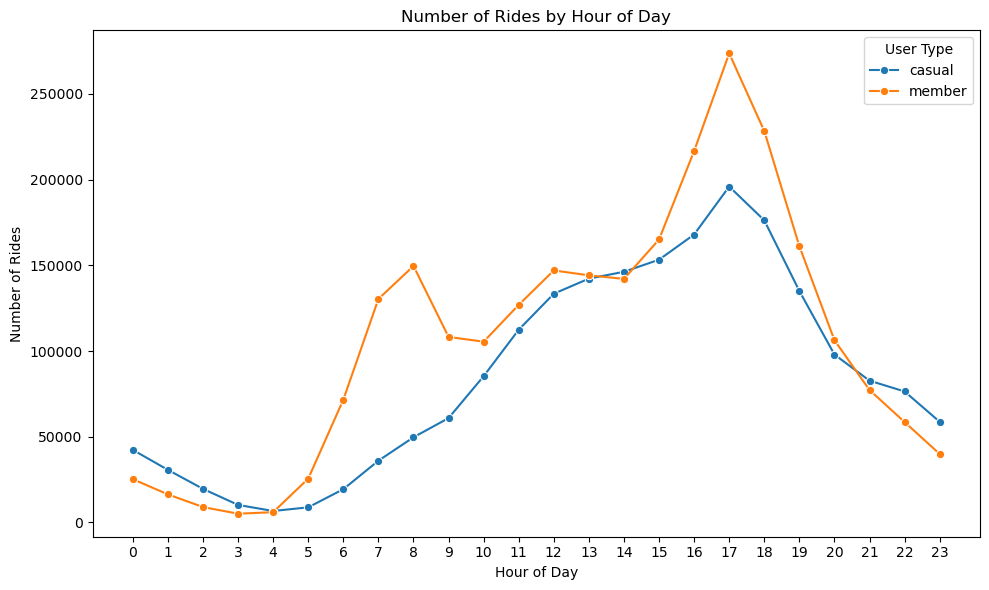

In [30]:
# plotting the ride count against the hour of the day for both members and casual riders
rides_by_hour = df.groupby(["member_casual", "started_at_hour"], observed=True).size().reset_index(name='ride_count')

plt.figure(figsize=(10,6))
sns.lineplot(data=rides_by_hour, x='started_at_hour', y='ride_count', hue='member_casual', marker='o')
plt.title('Number of Rides by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.legend(title='User Type')
plt.tight_layout()
plt.show()

**Key insight:** 
- Members use peaks at start/finsh of work day once again suggesting use for commuting purposes. Casual rider peak is spread from late morning to the afternoon suggesting leisurely use. A smart business tactic would be to ensure bikes are available after midday in tourist areas for casual riders and in business districts in the early morning and afternoon (5pm -6pm) for members

### 5.6 Creating a barplot showing number of riders for each rideable mode by user type

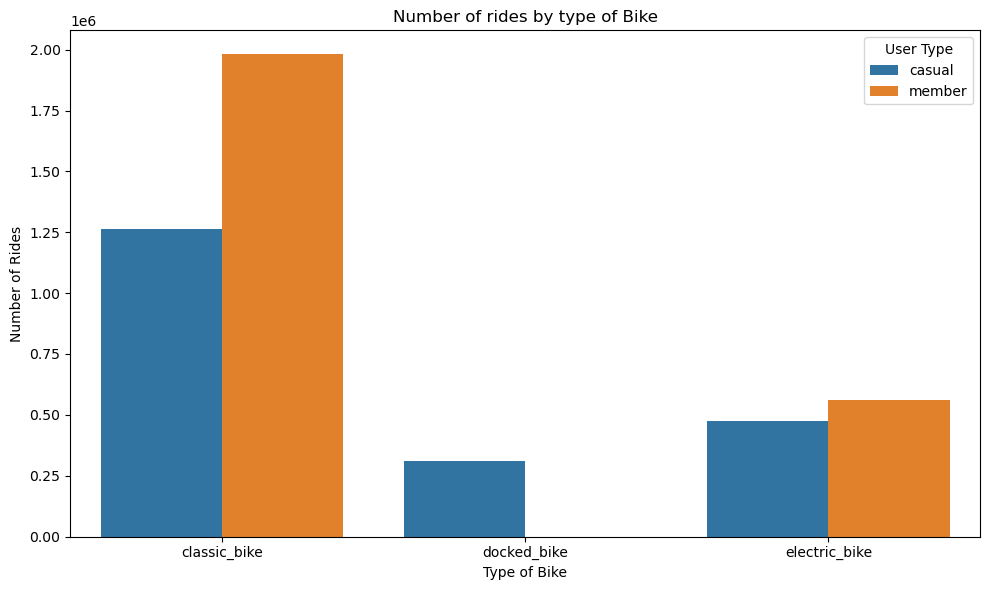

In [31]:
# plotting the ride count against bike type for both members and casual riders

ride_count_by_type = df.groupby(["member_casual", "rideable_type"], observed=True).size().reset_index(name='ride_count')

plt.figure(figsize=(10,6))
sns.barplot(data=ride_count_by_type, x='rideable_type', y='ride_count', hue='member_casual')
plt.title('Number of rides by type of Bike')
plt.xlabel('Type of Bike')
plt.ylabel('Number of Rides')
plt.legend(title='User Type')
plt.tight_layout()
plt.show()

**Key insight:** 
- Casual riders favour e-bikes whereas members prefer classic bikes. E-bikes should be distributed in high tourist areas and classic bikes should be well stocked near work hubs

### 5.7 Boxplot of Top 10 commonly used stations by user type

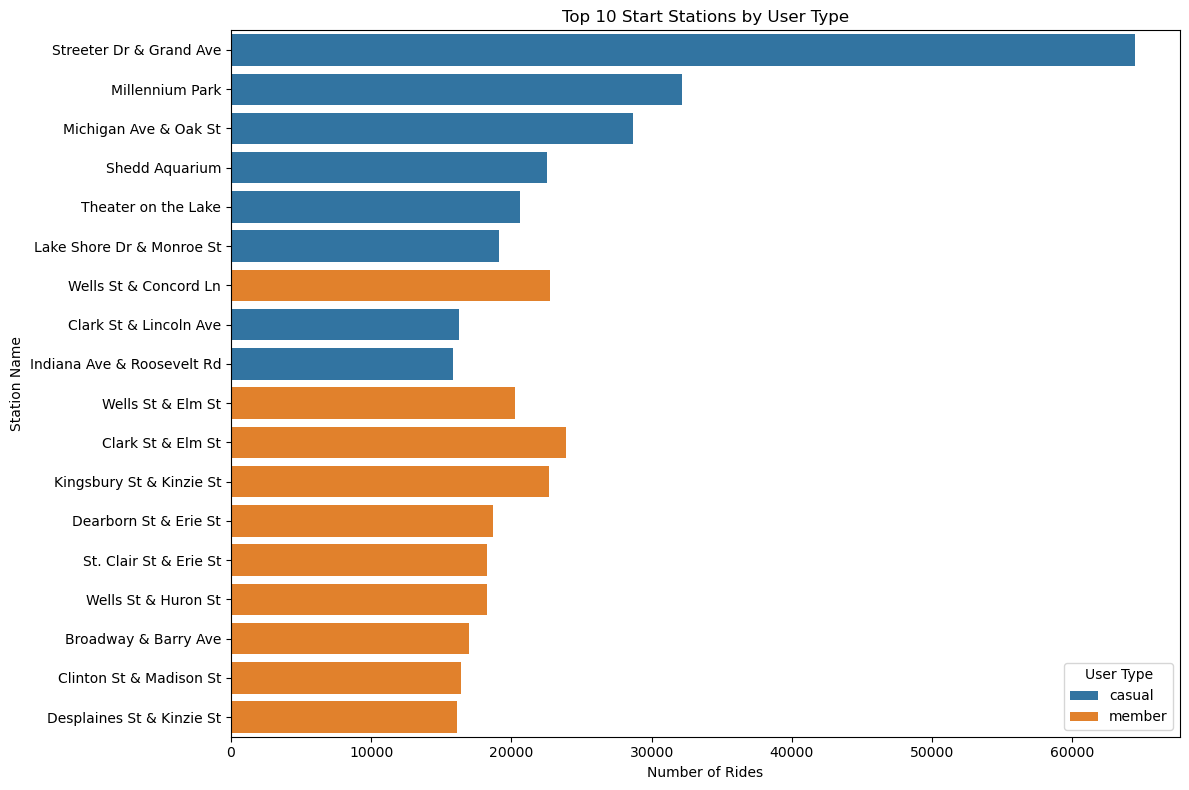

In [35]:
# plotting most commonly used stations by user type
top_stations = (
    df.groupby(['member_casual', 'start_station_name'])
    .size()
    .reset_index(name='ride_count')
)

# get top 10 stations for each user type
top_stations = (
    top_stations.sort_values(['member_casual', 'ride_count'], ascending=[True, False])
    .groupby('member_casual')
    .head(10)
)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_stations,
    y='start_station_name',
    x='ride_count',
    hue='member_casual',
    dodge=False
)
plt.title('Top 10 Start Stations by User Type')
plt.xlabel('Number of Rides')
plt.ylabel('Station Name')
plt.legend(title='User Type')
plt.tight_layout()
plt.show()


**Key insight**

- Casual riders tend to use cluster around tourist heavy stations
- Members tend to cluster around stations near office districts and residential areas

### 5.8 Heatmap of Bike Usage by Day of Week and Hour for Members vs Casual Riders

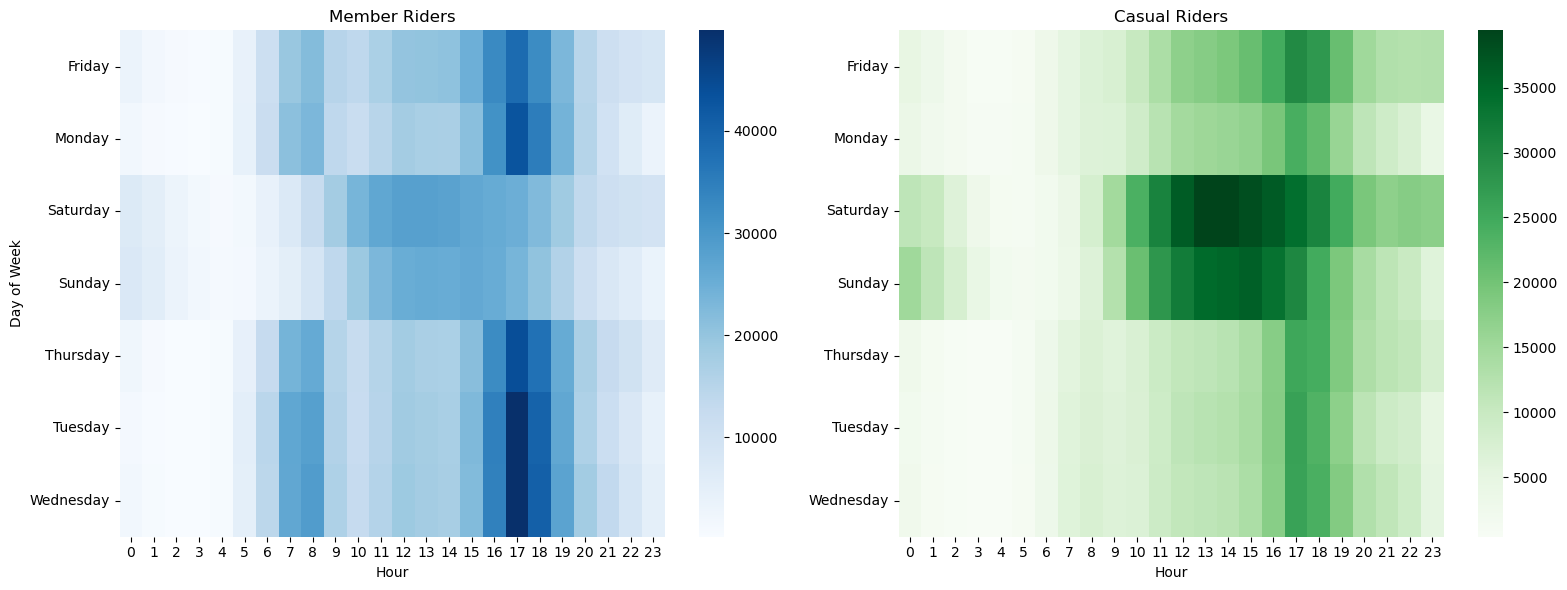

In [26]:
# Filter for members
df_member = df[df['member_casual'] == 'member']
pivot_member = df_member.pivot_table(index='started_at_day', columns='started_at_hour', values='ride_id', aggfunc='count', fill_value=0, observed=False)

# Filter for casuals
df_casual = df[df['member_casual'] == 'casual']
pivot_casual = df_casual.pivot_table(index='started_at_day', columns='started_at_hour', values='ride_id', aggfunc='count', fill_value=0, observed=False)

# Plot both
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.heatmap(pivot_member, cmap='Blues')
plt.title('Member Riders')
plt.xlabel('Hour')
plt.ylabel('Day of Week')

plt.subplot(1, 2, 2)
sns.heatmap(pivot_casual, cmap='Greens')
plt.title('Casual Riders')
plt.xlabel('Hour')
plt.ylabel('')

plt.tight_layout()
plt.show()

**Key insight:**
- Heat map confirms findings from barchart: members tend to ride on weekdays during commuting hours whereas casual riders tend to ride on the weekends and the peak is spread out from late morning to the afternoon

---
## 6. Act — Recommendations
### 6.1 Members ride mostly on weekdays during commute hours

**Action:**

- Launch a weekday commuter loyalty program (e.g., discounted monthly plans for frequent weekday riders).

- Increase bike availability in business districts between 7–9 AM and 5–7 PM to meet peak commuting demand.

### 6.2 Casual riders peak on weekends and have longer rides (recreational use)

**Action:**

- Create weekend/day pass packages targeting tourists and leisure riders.

- Market long-ride discounts (e.g., reduced rates for rides over 45 minutes) to appeal to recreational users.


### 6.3 Casual riders favor e-bikes; members prefer classic bikes

**Action:**

- Redistribute e-bikes to tourist-heavy stations (casual hotspots).

- Stock classic bikes at commuter-heavy stations near workplaces and transit hubs.

### 6.4 Monthly analysis shows clear seasonal spikes

**Action:**

- Increase fleet size in summer months to meet higher demand.

- Offer off-season promotions to encourage winter ridership (e.g., “winter ride discounts”).


### 6.5 Casual riders favour tourist heavy stations

**Action**

- Utilise promotions at top casual stations (QR codes on bikes) offering discounted trial memberships.

### 6.6 Members favour stations near office districts and residential areas

**Action**

- Ensure high bike availability during peak commuting hours
